# Exploratory analysis of Unsplash dataset


Click [here](#unlabelled), to skip the preprocessing part and load the dataset.

## Loading libraries

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import os
import sys

sys.path.insert(0, os.path.abspath('../../'))

In [2]:
import utils.data_utils as du

In [3]:
pd.options.display.max_columns = 26
pd.options.display.max_rows = 40

In [4]:
%run plt_style.py

## Loading the datasets in Pandas

Make sure that you correctly point to the correct path.

In [4]:
path = '../../../dataset/csv/exif-dataset/unsplash-dataset/'
#path = '../../dataset/unsplash-dataset-v1.1.0/'
#documents = ['photos','colors']
documents = ['photos']

datasets = {}

for doc in documents:
    files = glob(path + doc + ".tsv*")

    subsets = []
    for filename in files:
        df = pd.read_csv(filename, sep='\t', header=0)
        subsets.append(df)

    datasets[doc] = pd.concat(subsets, axis=0, ignore_index=True)

In [5]:
datasets['photos'].head()

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photographer_username,photographer_first_name,photographer_last_name,exif_camera_make,exif_camera_model,exif_iso,exif_aperture_value,exif_focal_length,exif_exposure_time,photo_location_name,photo_location_latitude,photo_location_longitude,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence
0,8ZgJyLGbC7Y,https://unsplash.com/photos/8ZgJyLGbC7Y,https://images.unsplash.com/40/KJyFV5SZSweiYGh...,2014-07-05 13:43:36,t,martindorsch,Martin,Dörsch,SONY,SLT-A77V,100.0,8.0,28.0,1/640,"Weigersdorf 29, 4551 Weigersdorf, Austria, Wei...",48.043625,14.066983,Austria,Weigersdorf,8278047,52989,narrow road in between soil grounds,NaN,NaN,NaN,NaN
1,-_rYK0egLWE,https://unsplash.com/photos/-_rYK0egLWE,https://images.unsplash.com/31/xDtuvK3GRJGUSUH...,2014-03-18 16:35:04,t,oliviahenry,Olivia,Henry,Canon,Canon EOS 1100D,250.0,5.6,55.0,1/800,NaN,NaN,NaN,NaN,NaN,5123860,42464,sea waves splashing through stone,NaN,NaN,NaN,NaN
2,PewUcrT1yIw,https://unsplash.com/photos/PewUcrT1yIw,https://images.unsplash.com/photo-141535311598...,2014-11-07 09:44:28,t,freephotosbydawn,Dawn,Emerick,Canon,Canon EOS REBEL T3i,400.0,8.0,18.0,0.3,NaN,NaN,NaN,NaN,NaN,1571552,7214,tall palm trees near sea with docks taken unde...,NaN,NaN,NaN,NaN
3,kFxWDfj0pD8,https://unsplash.com/photos/kFxWDfj0pD8,https://images.unsplash.com/photo-142224671965...,2015-01-26 04:20:40,t,alexjones,Alex,Jones,Canon,Canon EOS REBEL T3,1600.0,1.8,50.0,1/500,NaN,NaN,NaN,NaN,NaN,2843128,12718,stack of firewoods,NaN,NaN,NaN,NaN
4,r3ZWnitp3zk,https://unsplash.com/photos/r3ZWnitp3zk,https://images.unsplash.com/photo-141582700792...,2014-11-12 21:17:08,t,envisual,Charlie,Hang,NIKON CORPORATION,NIKON D3200,100.0,5.6,55.0,1/100,NaN,NaN,NaN,NaN,NaN,961314,3119,brown rock formation on body of water,NaN,NaN,NaN,NaN


In [6]:
datasets['photos'].shape

(25000, 26)

# Exploratory analysis
   

## Photos

In [7]:
datasets['photos'].columns

Index(['photo_id', 'photo_url', 'photo_image_url', 'photo_submitted_at',
       'photo_featured', 'photographer_username', 'photographer_first_name',
       'photographer_last_name', 'exif_camera_make', 'exif_camera_model',
       'exif_iso', 'exif_aperture_value', 'exif_focal_length',
       'exif_exposure_time', 'photo_location_name', 'photo_location_latitude',
       'photo_location_longitude', 'photo_location_country',
       'photo_location_city', 'stats_views', 'stats_downloads',
       'ai_description', 'ai_primary_landmark_name',
       'ai_primary_landmark_latitude', 'ai_primary_landmark_longitude',
       'ai_primary_landmark_confidence'],
      dtype='object')

## Null values

In [8]:
datasets['photos'].isna().sum()

photo_id                              0
photo_url                             0
photo_image_url                       0
photo_submitted_at                    0
photo_featured                        0
photographer_username                 0
photographer_first_name               0
photographer_last_name             1656
exif_camera_make                   2830
exif_camera_model                  2874
exif_iso                           3215
exif_aperture_value                3616
exif_focal_length                  3517
exif_exposure_time                 3238
photo_location_name               15522
photo_location_latitude           18105
photo_location_longitude          18108
photo_location_country            16437
photo_location_city               19016
stats_views                           0
stats_downloads                       0
ai_description                     1393
ai_primary_landmark_name          25000
ai_primary_landmark_latitude      25000
ai_primary_landmark_longitude     25000


## Unsplash v1.1.0+ includes color table

In [50]:
dfcolours=datasets['colors'].copy()

In [51]:
dfcolours.head()

,photo_id,hex,red,green,blue,keyword,ai_coverage,ai_score
0,QLDsnAtuyQU,9DA2A3,157,162,163,darkgray,0.056800,0.213593
1,P2iRe3Okd4U,6C6F6C,108,111,108,dimgray,0.259333,0.256897
2,xXa4h--mrbM,9B684E,155,104,78,sienna,0.024133,0.065972
3,xXa4h--mrbM,C54830,197,72,48,sienna,0.035600,0.056608
4,Wtc9YH-g8Ag,ACBFCE,172,191,206,lightsteelblue,0.013333,0.056855


In [54]:
dfcolours.loc[dfcolours['photo_id']=='P2iRe3Okd4U']

,photo_id,hex,red,green,blue,keyword,ai_coverage,ai_score
1,P2iRe3Okd4U,6C6F6C,108,111,108,dimgray,0.259333,0.256897
207,P2iRe3Okd4U,E0E1D9,224,225,217,gainsboro,0.001933,0.000990
409,P2iRe3Okd4U,BBBBB4,187,187,180,silver,0.015267,0.006914
410,P2iRe3Okd4U,394A58,57,74,88,darkslategray,0.002733,0.004085
512,P2iRe3Okd4U,545755,84,87,85,dimgray,0.215133,0.281587
1124,P2iRe3Okd4U,323539,50,53,57,darkslategray,0.156333,0.327441
1125,P2iRe3Okd4U,191C21,25,28,33,black,0.151333,0.059398
1126,P2iRe3Okd4U,969894,150,152,148,darkgray,0.158933,0.019438
1327,P2iRe3Okd4U,273442,39,52,66,darkslategray,0.034933,0.036319
1939,P2iRe3Okd4U,15202B,21,32,43,black,0.004000,0.006932


## Isolate the usefull features

In [9]:
df = datasets.copy()
photos = df['photos'].loc[:,['photo_id','photo_url', 'photo_image_url','exif_camera_make','exif_camera_model','exif_iso','exif_focal_length','exif_aperture_value','exif_exposure_time']]

#photos = df['photos'].loc[:,['photo_id','photo_url', 'photo_image_url','exif_camera_make','exif_camera_model','exif_iso','exif_focal_length','exif_aperture_value','exif_exposure_time','photo_width', 'photo_height', 'photo_aspect_ratio']]

## Data Cleaning

In [10]:
du.clean_iso(photos)

/home/steve/.virtualenvs/cgdev/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
du.clean_focal(photos,'mm|-|~')

Raw: 91 mm
91.0
Raw: 35mm
35.0
Raw: 85mm
85.0
Raw: 50mm
50.0
Raw: 200mm
200.0
Raw: 24mm
24.0
Raw: 60mm
60.0
Raw: 75-300
75-300->NaN
nan
Raw: 70-300
70-300->NaN
nan
Raw: 21mm
21.0
Raw: 18-105
18-105->NaN
nan
Raw: 35mm
35.0
Raw: 58mm
58.0
Raw: 18-55mm
18-55.0->NaN
nan
Raw: 74mm
74.0
Raw: 16mm
16.0
Raw: 42mm
42.0
Raw: 18mm
18.0
Raw: 14mm
14.0
Raw: 50 mm
50.0
Raw: 50 mm
50.0
Raw: 135mm
135.0
Raw: 35mm
35.0
Raw: 70-200
70-200->NaN
nan
Raw: 85mm
85.0
Raw: 35 mm
35.0
Raw: 50mm
50.0
Raw: 4.0 ~ 28mm
4.0~28.0_>NaN
nan
Raw: 50mm
50.0
Raw: 46mm
46.0
Raw: 200 mm
200.0
Raw: 50mm
50.0
Raw: 200mm
200.0
Raw: 50mm
50.0
Raw: 14mm
14.0
Raw: 85mm
85.0
Raw: 135mm
135.0
Raw: 18mm
18.0
Raw: 18-50
18-50->NaN
nan


In [12]:
du.clean_exposures(photos,'s')

Raw: 15s
15
 
Raw: 30s
30
 
Raw: 15s
15
 
Raw: 13s
13
 
Raw: 15s
15
 
Raw: 10s
10
 
Raw: 180s
180
 
Raw: 1 / 200s
1/200
 
Raw: 180s
180
 
Raw: 120s
120
 
Raw: 1/100s
1/100
 
Raw: 1/60s
1/60
 
Raw: 4s
4
 
Raw: 30s
30
 
Raw: 1/80s
1/80
 
Raw: 1/400s
1/400
 
Raw: 1/120s
1/120
 
Raw: 13s
13
 
Raw: 30s
30
 
Raw: 63 Seconds
63
 
Raw: 300s
300
 
Raw: 1/200s
1/200
 


In [13]:
du.clean_apertures(photos,',|f/|undef|inf|Inf|f')

Raw: inf
Raw: Inf
Raw: undef
Raw: undef
Raw: f/2.8
Raw: inf
Raw: 5,6
Raw: undef
Raw: undef
Raw: undef
Raw: 4,5
Raw: 5,6
Raw: 7,5
Raw: 7,5
Raw: undef
Raw: undef
Raw: f/5
Raw: f/5
Raw: f4.0
Raw: Inf
Raw: undef
Raw: undef
Raw: f/8
Raw: f4
Raw: f14
Raw: undef
Raw: 9,0
Raw: inf
Raw: inf
Raw: inf
Raw: undef
Raw: inf
Raw: inf
Raw: inf
Raw: f/5.6
Raw: 5,6
Raw: Inf
Raw: 1,8


## Discriminate Horizontal & Vertical Images

Unsplash v1.0 does not have image width/heigth and ratio features.
The next block opens images and computes the orientation.
It is obsolete now as the new dataset contains these feature and the orientation is computed on the fly. See below

In [5]:
photos = pd.read_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/dataset.csv')

In [ ]:
from image_analysis.im_analysis import ImageAnalysis

In [14]:
ia = ImageAnalysis('../../../dataset/csv/exif-dataset/dataset-unlabelled/dataset.csv', '/media/steve/Data2/unsplash-dataset/unsplash-original/', './')
photos = ia.orientation()

In [20]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000.0,4000.0
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272.0,2848.0
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067.0,3375.0
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272.0,2797.0
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104.0,3454.0
...,...,...,...,...,...,...,...,...,...,...
24995,mle1P_kq9mw,NaN,NaN,NaN,NaN,NaN,NaN,1,4000.0,2667.0
24996,lPqq7oriWnw,Canon,Canon EOS R,640.0,105.0,4.0,1/100,1,6720.0,4480.0
24997,8M3ekCRYwoA,Canon,Canon EOS Rebel SL2,100.0,75.0,4.0,1/250,0,3797.0,5695.0
24998,BnClgTh2kMU,SONY,ILCE-6000,100.0,18.0,16.0,1/100,0,3676.0,5514.0


In [35]:
photos['photo_aspect_ratio'] = photos['photo_width']/photos['photo_height']

In [37]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000.0,4000.0,1.500000
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272.0,2848.0,1.500000
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067.0,3375.0,1.501333
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272.0,2797.0,1.527351
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104.0,3454.0,1.477707
...,...,...,...,...,...,...,...,...,...,...,...
24995,mle1P_kq9mw,NaN,NaN,NaN,NaN,NaN,NaN,1,4000.0,2667.0,1.499813
24996,lPqq7oriWnw,Canon,Canon EOS R,640.0,105.0,4.0,1/100,1,6720.0,4480.0,1.500000
24997,8M3ekCRYwoA,Canon,Canon EOS Rebel SL2,100.0,75.0,4.0,1/250,0,3797.0,5695.0,0.666725
24998,BnClgTh2kMU,SONY,ILCE-6000,100.0,18.0,16.0,1/100,0,3676.0,5514.0,0.666667


In [38]:
photos = photos.to_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/dataset.csv')

## Load New Images

In [14]:
new_photos = pd.read_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/new_photos.csv')

In [15]:
new_photos

,photo_id,photo_url,photo_image_url,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,photo_width,photo_height,photo_aspect_ratio,orientation
0,79hJX_Wl6ac,https://unsplash.com/photos/79hJX_Wl6ac,https://images.unsplash.com/photo-151338385990...,Canon,Canon EOS 5D Mark II,100.0,50.0,1.8,1/200,3744,5616,0.67,0
1,9cH-uVU__0c,https://unsplash.com/photos/9cH-uVU__0c,https://images.unsplash.com/photo-150733178908...,Canon,Canon EOS 6D,200.0,80.0,5.6,1/80,3648,5472,0.67,0
2,A9Vbvh_dMG0,https://unsplash.com/photos/A9Vbvh_dMG0,https://images.unsplash.com/photo-145562546434...,SONY,ILCE-7R,100.0,55.0,9.0,1/160,3000,2001,1.50,1
3,BMO1D0CmiJo,https://unsplash.com/photos/BMO1D0CmiJo,https://images.unsplash.com/photo-150431164001...,NaN,NaN,NaN,NaN,NaN,NaN,4240,2832,1.50,1
4,DoMfuJkUuU0,https://unsplash.com/photos/DoMfuJkUuU0,https://images.unsplash.com/photo-152106072399...,Canon,Canon EOS 6D,100.0,50.0,5.6,1/500,3648,5472,0.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,qQWcD3bPFYs,https://unsplash.com/photos/qQWcD3bPFYs,https://images.unsplash.com/photo-148298700145...,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,3088,2048,1.51,1
314,OSwea3yxjT0,https://unsplash.com/photos/OSwea3yxjT0,https://images.unsplash.com/photo-149268351305...,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,5184,3456,1.50,1
315,0ZQ8vojHNuc,https://unsplash.com/photos/0ZQ8vojHNuc,https://images.unsplash.com/photo-151589043578...,SONY,ILCE-6500,160.0,30.0,1.4,1/160,6000,4000,1.50,1
316,tTjspeLiy1M,https://unsplash.com/photos/tTjspeLiy1M,https://images.unsplash.com/photo-158407979752...,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,5611,3741,1.50,1


## Unsplash v1.1.0+
### Mark orientation label, 1: horizontal, 0: vertical
This version does contains image width/heigth and ratio features.

In [18]:
orientation_labels = np.where(new_photos['photo_width']>new_photos['photo_height'],1,0)

In [19]:
new_photos['orientation'] = orientation_labels

In [20]:
new_photos

,photo_id,photo_url,photo_image_url,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,photo_width,photo_height,photo_aspect_ratio,orientation
0,79hJX_Wl6ac,https://unsplash.com/photos/79hJX_Wl6ac,https://images.unsplash.com/photo-151338385990...,Canon,Canon EOS 5D Mark II,100.0,50.0,1.8,1/200,3744,5616,0.67,0
1,9cH-uVU__0c,https://unsplash.com/photos/9cH-uVU__0c,https://images.unsplash.com/photo-150733178908...,Canon,Canon EOS 6D,200.0,80.0,5.6,1/80,3648,5472,0.67,0
2,A9Vbvh_dMG0,https://unsplash.com/photos/A9Vbvh_dMG0,https://images.unsplash.com/photo-145562546434...,SONY,ILCE-7R,100.0,55.0,9.0,1/160,3000,2001,1.50,1
3,BMO1D0CmiJo,https://unsplash.com/photos/BMO1D0CmiJo,https://images.unsplash.com/photo-150431164001...,NaN,NaN,NaN,NaN,NaN,NaN,4240,2832,1.50,1
4,DoMfuJkUuU0,https://unsplash.com/photos/DoMfuJkUuU0,https://images.unsplash.com/photo-152106072399...,Canon,Canon EOS 6D,100.0,50.0,5.6,1/500,3648,5472,0.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,qQWcD3bPFYs,https://unsplash.com/photos/qQWcD3bPFYs,https://images.unsplash.com/photo-148298700145...,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,3088,2048,1.51,1
314,OSwea3yxjT0,https://unsplash.com/photos/OSwea3yxjT0,https://images.unsplash.com/photo-149268351305...,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,5184,3456,1.50,1
315,0ZQ8vojHNuc,https://unsplash.com/photos/0ZQ8vojHNuc,https://images.unsplash.com/photo-151589043578...,SONY,ILCE-6500,160.0,30.0,1.4,1/160,6000,4000,1.50,1
316,tTjspeLiy1M,https://unsplash.com/photos/tTjspeLiy1M,https://images.unsplash.com/photo-158407979752...,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,5611,3741,1.50,1


In [17]:
new_photos.to_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/new_photos.csv')

## Merge old dataset with new photos

In [5]:
photos = pd.read_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/dataset.csv')
new_photos = pd.read_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/new_photos.csv')

In [6]:
new_photos.drop(columns=['photo_url','photo_image_url','photo_width','photo_height','photo_aspect_ratio'],inplace=True)

In [7]:
new_photos.drop(columns=['photo_url','photo_image_url'],inplace=True)

KeyError: "['photo_url' 'photo_image_url'] not found in axis"

In [8]:
photos = pd.concat([photos,new_photos],ignore_index=True)

In [9]:
photos

,Unnamed: 0,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio
0,0.0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000.0,4000.0,1.500000
1,1.0,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272.0,2848.0,1.500000
2,2.0,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067.0,3375.0,1.501333
3,3.0,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272.0,2797.0,1.527351
4,4.0,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104.0,3454.0,1.477707
...,...,...,...,...,...,...,...,...,...,...,...,...
25313,NaN,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
25314,NaN,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1,NaN,NaN,NaN
25315,NaN,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1,NaN,NaN,NaN
25316,NaN,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1,NaN,NaN,NaN


In [14]:
dict(Counter(photos['orientation'])).values()

dict_values([13527, 11791])

In [16]:
dict(Counter(photos['orientation'])).keys()

dict_keys([1, 0])

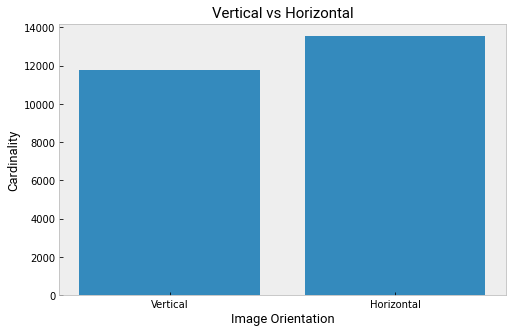

In [13]:
plt.style.use('bmh')

fig = plt.figure(figsize=(8,5), facecolor='white')
ax = plt.subplot(111)

plt.title("Vertical vs Horizontal", {'fontname':'Roboto', 'fontsize':15})
plt.ylabel('Cardinality', {'fontname':'Roboto', 'fontsize':13})
plt.xlabel('Image Orientation', {'fontname':'Roboto', 'fontsize':13})
plt.xticks([0,1],['Vertical','Horizontal'])

plt.bar(dict(Counter(photos['orientation'])).keys(), dict(Counter(photos['orientation'])).values())
plt.grid(None)
plt.savefig('vvsh.png', dpi=100, transparent=False)

#### Write dataset
<a id='unlabelled'></a>

In [76]:
photos.to_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/photos.csv')

# Load Unlabelled dataset


In [5]:
photos = pd.read_csv('../../../dataset/csv/exif-dataset/dataset-unlabelled/photos.csv')

In [6]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000,4000,1.500000
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272,2848,1.500000
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067,3375,1.501333
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104,3454,1.477707
...,...,...,...,...,...,...,...,...,...,...,...
25313,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1,3088,2048,1.510000
25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1,5184,3456,1.500000
25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1,6000,4000,1.500000
25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1,5611,3741,1.500000


# Create labels

## Iso Noise Labels

### Binary Labels

In [83]:
photos.loc[(photos['exif_iso']>0) & (photos['exif_iso']<500), 'iso_noise_bin_label'] = 0
photos.loc[(photos['exif_iso']>=500), 'iso_noise_bin_label'] = 1

### Multilabels

In [84]:
photos.loc[(photos['exif_iso']>0) & (photos['exif_iso']<500), 'iso_noise_label'] = 0
photos.loc[(photos['exif_iso']>=500) & (photos['exif_iso']<1800), 'iso_noise_label'] = 1
photos.loc[(photos['exif_iso']>=1800), 'iso_noise_label'] = 2

## Depth of Field Labels - Aperture

### Binary Labels

In [85]:
photos.loc[(photos['exif_aperture_value']>0.0) & (photos['exif_aperture_value']<=3.5), 'DoF_bin'] = 0
photos.loc[(photos['exif_aperture_value']>3.5), 'DoF_bin'] = 1

### Multilabels

In [86]:
photos.loc[(photos['exif_aperture_value']>0.0) & (photos['exif_aperture_value']<3.2), 'DoF'] = 0
photos.loc[(photos['exif_aperture_value']>=3.2) & (photos['exif_aperture_value']<=5.6), 'DoF'] = 1
photos.loc[(photos['exif_aperture_value']>5.6), 'DoF'] = 2

### Exposure labels - Long, medium, quick

In [87]:
exp_zero_labels = []
exp_one_labels = []
exp_two_labels = []
idx = photos.index
for i in idx:
    a = photos['exif_exposure_time'].iloc[i]
    if '/' in str(a):
        if int(photos['exif_exposure_time'].iloc[i].split('/')[1]) <= 250:
            exp_one_labels.append(i)            
        elif int(photos['exif_exposure_time'].iloc[i].split('/')[1]) > 250:
            exp_two_labels.append(i)
    elif str(a)!='nan':
        exp_zero_labels.append(i)    

In [88]:
photos.loc[exp_zero_labels, 'exposure_label'] = 0
photos.loc[exp_one_labels, 'exposure_label'] = 1
photos.loc[exp_two_labels, 'exposure_label'] = 2

### Focal Length Label - Wide, standard, tele

### Binary labels

In [89]:
photos.loc[(photos['exif_focal_length']>0) & (photos['exif_focal_length']<=35), 'focal_label_bin'] = 0 # wide
photos.loc[(photos['exif_focal_length']>35), 'focal_label_bin'] = 1 # tele

### Multilabels

In [90]:
photos.loc[(photos['exif_focal_length']>0) & (photos['exif_focal_length']<=35), 'focal_label'] = 0 # wide
photos.loc[(photos['exif_focal_length']>35) & (photos['exif_focal_length']<=85), 'focal_label'] = 1 # standard
photos.loc[(photos['exif_focal_length']>85), 'focal_label'] = 2 # tele

In [91]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000,4000,1.500000,0.0,0.0,1.0,2.0,2.0,0.0,0.0
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272,2848,1.500000,0.0,0.0,1.0,1.0,2.0,1.0,1.0
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067,3375,1.501333,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351,1.0,1.0,0.0,0.0,2.0,1.0,1.0
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104,3454,1.477707,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25313,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1,3088,2048,1.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1,5184,3456,1.500000,0.0,0.0,0.0,0.0,2.0,1.0,1.0
25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1,6000,4000,1.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1,5611,3741,1.500000,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [425]:
photos.columns

Index(['photo_id', 'exif_camera_make', 'exif_camera_model', 'exif_iso',
       'exif_focal_length', 'exif_aperture_value', 'exif_exposure_time',
       'orientation', 'photo_width', 'photo_height', 'photo_aspect_ratio',
       'iso_noise_bin_label', 'iso_noise_label', 'DoF_bin', 'DoF',
       'exposure_label', 'focal_label_bin', 'focal_label'],
      dtype='object')

In [106]:
photos.to_csv('../../../dataset/csv/exif-dataset/exif_labelled_dataset.csv')

## Construct the dataset (train-valid-test) 
The idea is to split the free of NaN Exif photo samples,  in training, validation and test sets 

In [7]:
photos = pd.read_csv('../../../dataset/csv/exif-dataset/exif_labelled_dataset.csv')

In [8]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000,4000,1.500000,0.0,0.0,1.0,2.0,2.0,0.0,0.0
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272,2848,1.500000,0.0,0.0,1.0,1.0,2.0,1.0,1.0
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067,3375,1.501333,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351,1.0,1.0,0.0,0.0,2.0,1.0,1.0
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104,3454,1.477707,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25313,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1,3088,2048,1.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1,5184,3456,1.500000,0.0,0.0,0.0,0.0,2.0,1.0,1.0
25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1,6000,4000,1.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1,5611,3741,1.500000,0.0,0.0,0.0,0.0,2.0,0.0,0.0


### Load the dataset

In [4]:
train_full = pd.read_csv('../../../dataset/full/train.csv')
valid_full = pd.read_csv('../../../dataset/full/valid.csv')
test_full = pd.read_csv('../../../dataset/full/test.csv')

In [5]:
train_horizontal = pd.read_csv('../../../dataset/horizontal/train_horizontal.csv')
valid_horizontal = pd.read_csv('../../../dataset/horizontal/valid_horizontal.csv')
test_horizontal = pd.read_csv('../../../dataset/horizontal/test_horizontal.csv')

## Full dataset

In [9]:
train_valid_test_dataset = photos.dropna(axis=0, inplace=False, subset=[
                'exif_iso', 'iso_noise_bin_label', 'exif_focal_length',
                'exif_exposure_time', 'exif_aperture_value', 'orientation',
                'iso_noise_label', 'DoF', 'DoF_bin', 'exposure_label',
                'focal_label', 'focal_label_bin'])


# test with NaN = full - not null indices
test_nan = photos.drop(index=train_valid_test_dataset.index)

In [18]:
train_full, valid_full, test_full, test_nan_full = du.train_valid_test_split(photos)

## Horizontal - Vertical

In [20]:
horizontal_dataset = photos.loc[photos['orientation']==1]
vertical_dataset = photos.loc[photos['orientation']==0]

In [10]:
horizontal_dataset = train_valid_test_dataset.loc[photos['orientation']==1]
vertical_dataset = train_valid_test_dataset.loc[photos['orientation']==0]

### Horizontal

In [21]:
train_horizontal, valid_horizontal, test_horizontal, test_nan_horizontal = du.train_valid_test_split(horizontal_dataset)

In [27]:
print(train_horizontal.shape)
print(valid_horizontal.shape)
print(test_horizontal.shape)
print(test_nan_horizontal.shape)

(9140, 16)
(1142, 16)
(1143, 16)
(2096, 16)


In [22]:
print(train_horizontal.shape)
print(valid_horizontal.shape)
print(test_horizontal.shape)
print(test_nan_horizontal.shape)

(9140, 15)
(1142, 15)
(1143, 15)
(2096, 15)


### Vertical

In [23]:
train_vertical, valid_vertical, test_vertical, test_nan_vertical = du.train_valid_test_split(vertical_dataset)

In [24]:
print(train_vertical.shape)
print(valid_vertical.shape)
print(test_vertical.shape)
print(test_nan_vertical.shape)

(8016, 15)
(1002, 15)
(1002, 15)
(1777, 15)


# Exif analysis in Horizontal & Vertical datasets

In [11]:
import utils.plot_utils as pu

## Full

In [13]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000,4000,1.500000,0.0,0.0,1.0,2.0,2.0,0.0,0.0
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272,2848,1.500000,0.0,0.0,1.0,1.0,2.0,1.0,1.0
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067,3375,1.501333,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351,1.0,1.0,0.0,0.0,2.0,1.0,1.0
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104,3454,1.477707,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25313,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1,3088,2048,1.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1,5184,3456,1.500000,0.0,0.0,0.0,0.0,2.0,1.0,1.0
25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1,6000,4000,1.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1,5611,3741,1.500000,0.0,0.0,0.0,0.0,2.0,0.0,0.0


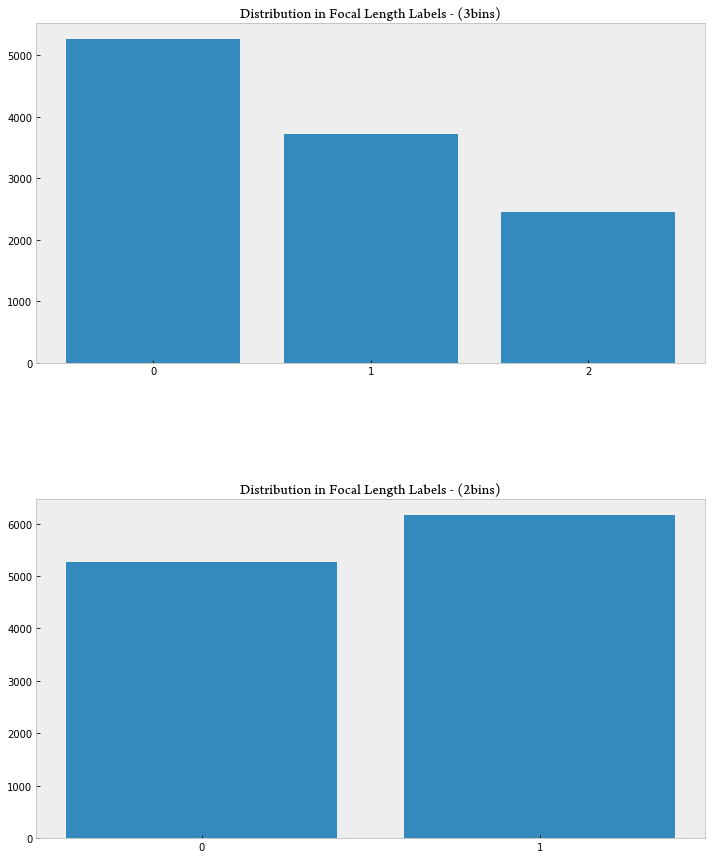

In [12]:
pu.label_distribution(train_valid_test_dataset,'dataset')

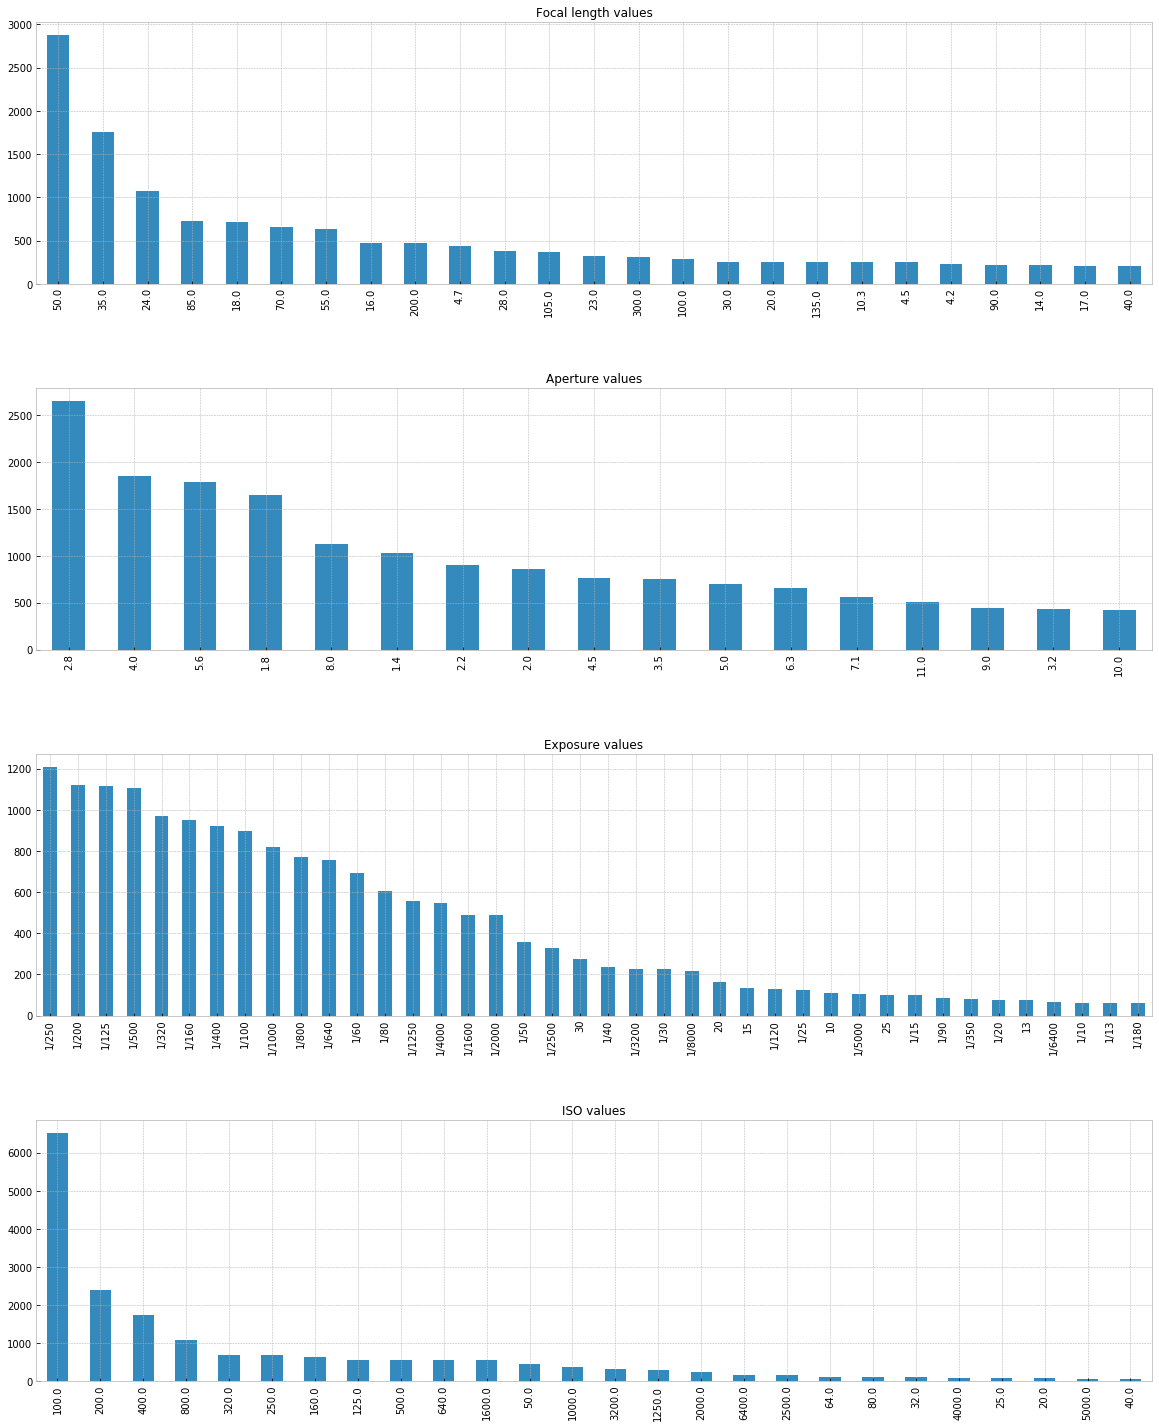

In [17]:
pu.exif_analysis(train_valid_test_dataset,'dataset')

### Horizontal

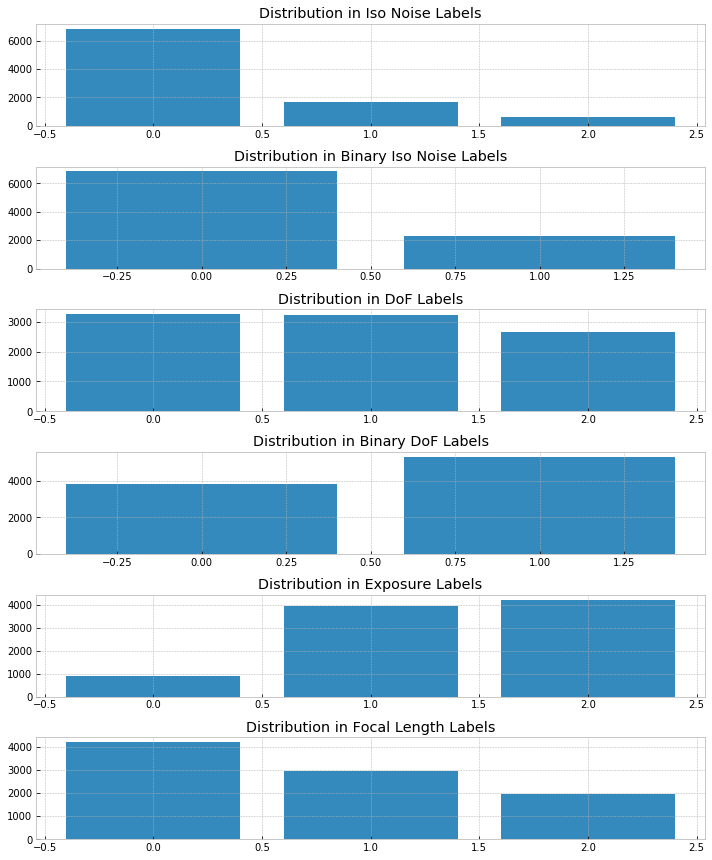

In [32]:
pu.label_distribution(horizontal_dataset,'dataset')

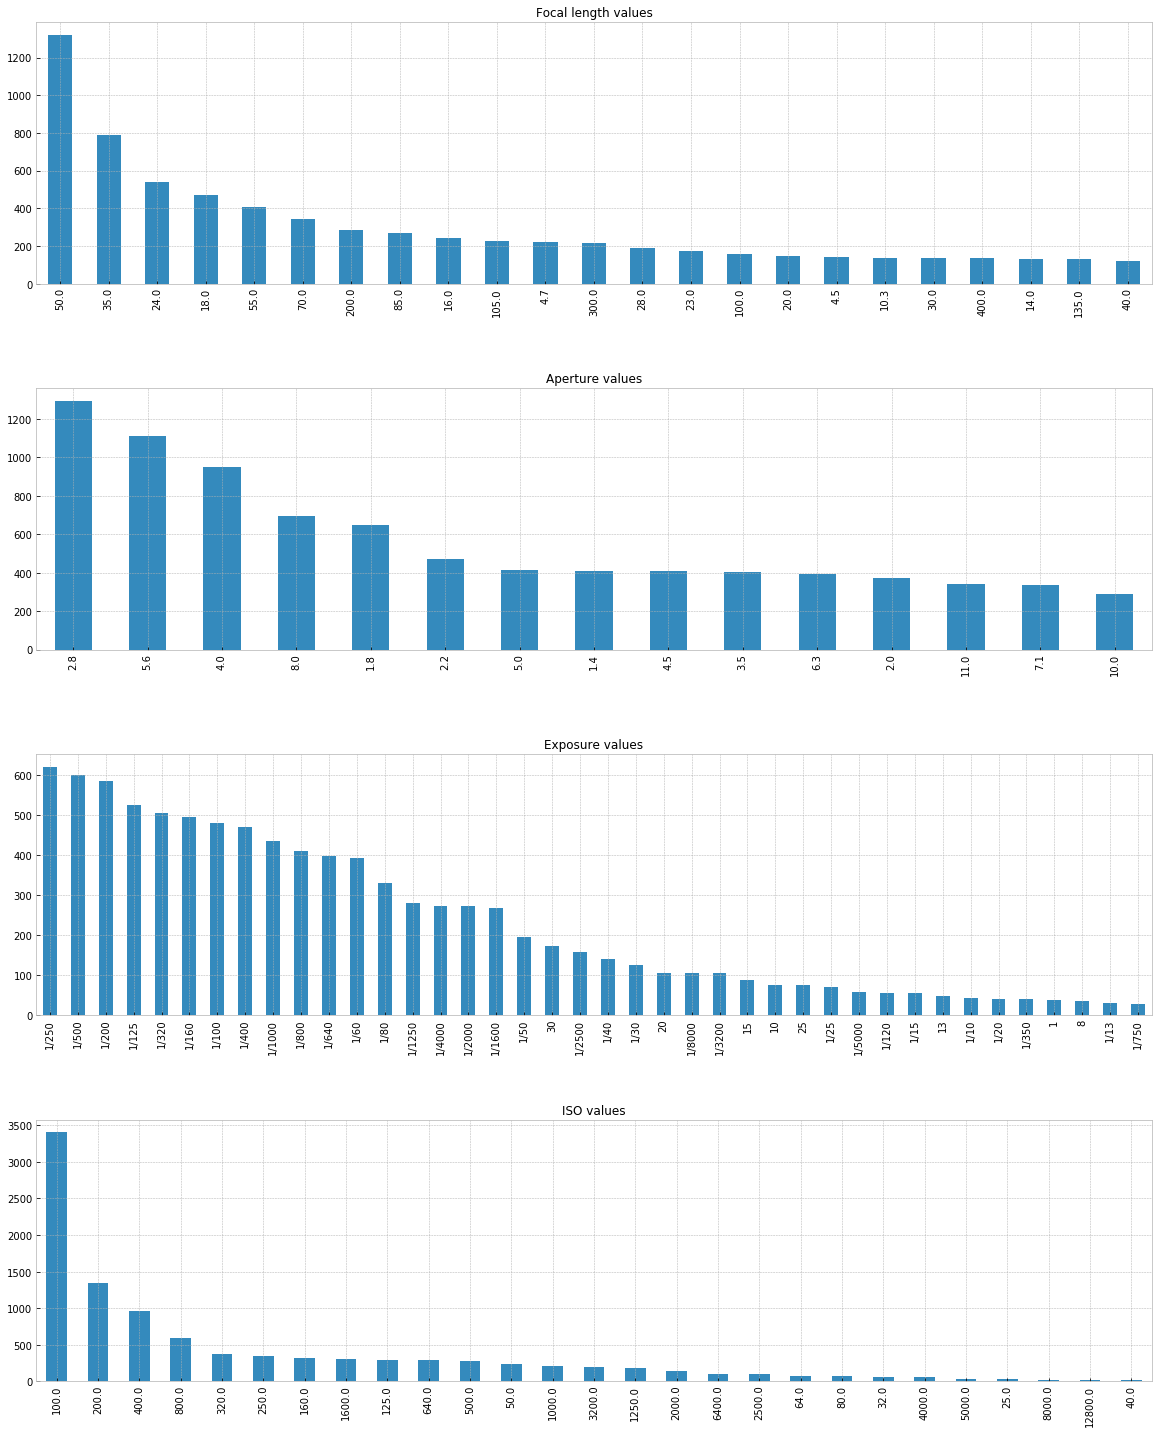

In [19]:
pu.exif_analysis(horizontal_dataset,'dataset')

### Vertical 

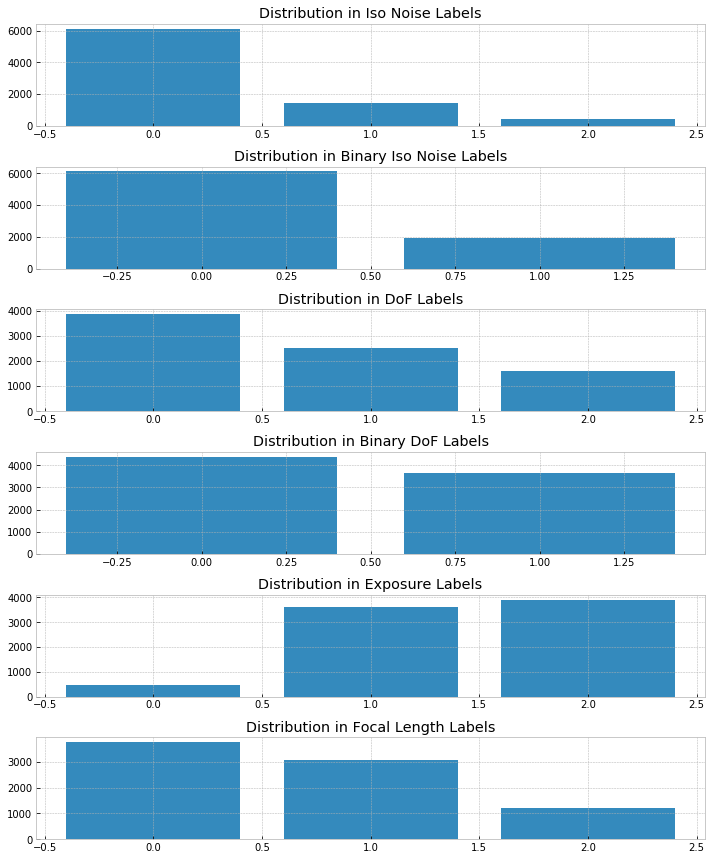

In [33]:
pu.label_distribution(vertical_dataset,'dataset')

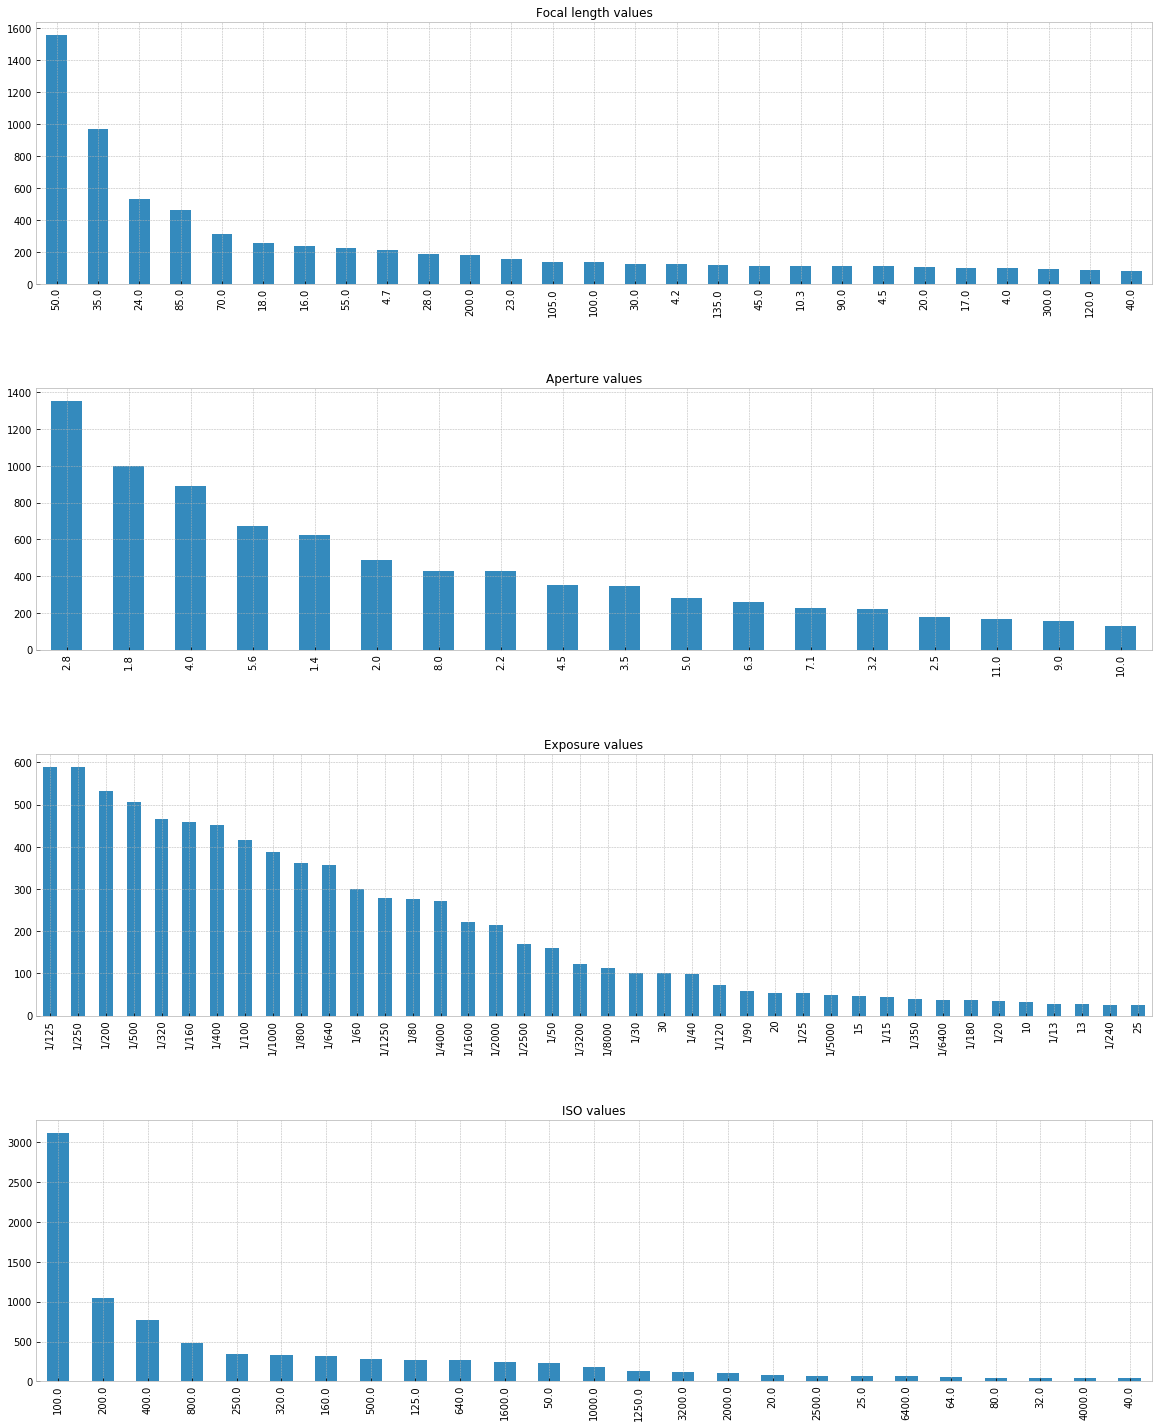

In [25]:
pu.exif_analysis(vertical_dataset,'dataset')

### Full Dataset

In [8]:
from collections import Counter

In [446]:
np.argmax(train_valid_test_dataset.photo_height)

18418

In [441]:
photos.iloc[11088]

photo_id                 AcG-unN00gw
exif_camera_make               Canon
exif_camera_model      Canon EOS 60D
exif_iso                         640
exif_focal_length                 40
exif_aperture_value              6.3
exif_exposure_time             1/125
orientation                        1
photo_width                    18000
photo_height                   12000
photo_aspect_ratio               1.5
iso_noise_bin_label                1
iso_noise_label                    1
DoF_bin                            1
DoF                                2
exposure_label                     1
focal_label_bin                    1
focal_label                        1
Name: 13163, dtype: object

In [447]:
train_valid_test_dataset.iloc[18418]

photo_id               v9GbU7Lhilg
exif_camera_make              SONY
exif_camera_model         ILCE-7M2
exif_iso                       800
exif_focal_length               29
exif_aperture_value              8
exif_exposure_time            1/40
orientation                      0
photo_width                   9900
photo_height                 14850
photo_aspect_ratio        0.666667
iso_noise_bin_label              1
iso_noise_label                  1
DoF_bin                          1
DoF                              2
exposure_label                   1
focal_label_bin                  0
focal_label                      0
Name: 21764, dtype: object

# Create DoF dataset - Horizontal and Vertical images

In [369]:
def binarize_dataset(dataset):

    dof_zero = dataset[dataset['DoF_bin'] == 0.0]
    dof_one = dataset[dataset['DoF_bin'] == 1.0]
    
    return dof_zero, dof_one

In [482]:
dof_zero, dof_one = binarize_dataset(train_valid_test_dataset)

### Unbalance dataset

In [483]:
train_valid_test_dataset.shape[0]

21445

In [484]:
dof_zero.shape

(10322, 18)

In [485]:
dof_one.shape

(11123, 18)

<BarContainer object of 2 artists>

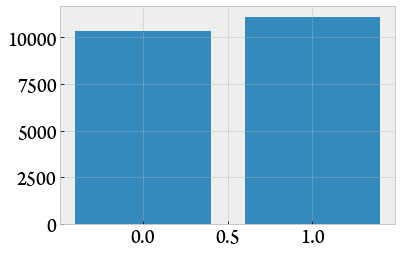

In [486]:
plt.bar(dict(Counter(train_valid_test_dataset['DoF_bin'])).keys(), dict(Counter(train_valid_test_dataset['DoF_bin'])).values())

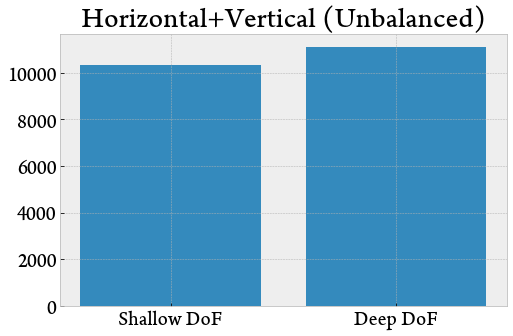

In [500]:
plt.style.use('bmh')
csfont = {'fontname':'Arno Pro'}
hfont = {'fontname':'Arno Pro'}

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.title(" Horizontal+Vertical (Unbalanced) ", **csfont)
plt.xticks([0,1],['Shallow DoF','Deep DoF'], **hfont)
plt.bar(dict(Counter(train_valid_test_dataset['DoF_bin'])).keys(), dict(Counter(train_valid_test_dataset['DoF_bin']))Counter(train_valid_test_dataset['DoF_bin'])).values().values())
plt.savefig('all_dof_unbalanced.png')

In [537]:
Counter(train_valid_test_dataset['DoF_bin']).values()

dict_values([11123, 10322])

## Undersample the majority class

In [488]:
dof_one_undersample = dof_one.sample(dof_zero.shape[0], random_state=0)

### Finally concat two bins

In [489]:
dof_train_valid_test = pd.concat([dof_zero, dof_one_undersample], axis=0)

In [490]:
dof_train_valid_test.shape

(20644, 18)

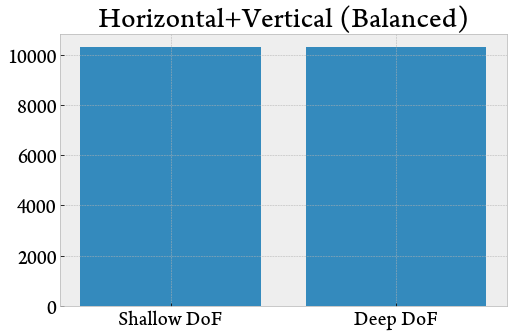

In [501]:
plt.style.use('bmh')
csfont = {'fontname':'Arno Pro'}
hfont = {'fontname':'Arno Pro'}

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.title(" Horizontal+Vertical (Balanced) ", **csfont)
plt.xticks([0,1],['Shallow DoF','Deep DoF'], **hfont)
plt.bar(dict(Counter(dof_train_valid_test['DoF_bin'])).keys(), dict(Counter(dof_train_valid_test['DoF_bin'])).values())
plt.savefig('all_dof_balanced.png')



In [432]:
dof_train_valid_test

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
3,kFxWDfj0pD8.jpg,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351,1.0,1.0,0,0.0,2.0,1.0,1.0
7,Gg7uKdHFb_c.jpg,Canon,Canon EOS REBEL T2i,100.0,18.0,3.5,1/1600,1,4442,2961,1.500169,0.0,0.0,0,1.0,2.0,0.0,0.0
9,ItGkpXAr8gk.jpg,Canon,Canon EOS REBEL T3,100.0,50.0,1.8,1/4000,1,4272,2848,1.500000,0.0,0.0,0,0.0,2.0,1.0,1.0
12,rDLBArZUl1c.jpg,Panasonic,DMC-GF1,100.0,20.0,1.8,1/200,0,3000,4000,0.750000,0.0,0.0,0,0.0,1.0,0.0,0.0
16,-Y-XzY0HhEM.jpg,Panasonic,DMC-SZ1,100.0,4.5,3.1,1/60,1,4608,3456,1.333333,0.0,0.0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,XMQI7_Q6ofM.jpg,Canon,Canon EOS 6D Mark II,100.0,35.0,7.1,1/250,1,6127,4085,1.499878,0.0,0.0,1,2.0,1.0,0.0,0.0
22686,qsEJGX4VqYU.jpg,PENTAX RICOH IMAGING,GR,100.0,18.3,5.0,1/125,1,2500,1656,1.509662,0.0,0.0,1,1.0,1.0,0.0,0.0
15184,ElOpIMNu-eA.jpg,SONY,ILCE-7M2,100.0,70.0,8.0,1/160,0,4000,5333,0.750047,0.0,0.0,1,2.0,1.0,1.0,1.0
7141,BVPQcIjXQ0o.jpg,SONY,ILCE-7M3,200.0,200.0,4.5,1/100,1,3002,2402,1.249792,0.0,0.0,1,1.0,1.0,1.0,2.0


## Horizontal Dataset Undersample

In [514]:
horizontal = train_valid_test_dataset[train_valid_test_dataset['orientation'] == 1]

In [515]:
dof_zero, dof_one = binarize_dataset(horizontal)

In [532]:
Counter(horizontal['DoF_bin']).values()

dict_values([6629, 4800])

In [533]:
horizontal

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,6000,4000,1.500000,0.0,0.0,1.0,2.0,2.0,0.0,0.0
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,4272,2848,1.500000,0.0,0.0,1.0,1.0,2.0,1.0,1.0
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,5067,3375,1.501333,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351,1.0,1.0,0.0,0.0,2.0,1.0,1.0
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,5104,3454,1.477707,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,aAQwxN-EOUI,Canon,Canon EOS 5D Mark II,100.0,200.0,4.5,1/500,1,5616,3744,1.500000,0.0,0.0,1.0,1.0,2.0,1.0,2.0
25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1,5184,3456,1.500000,0.0,0.0,0.0,0.0,2.0,1.0,1.0
25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1,6000,4000,1.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1,5611,3741,1.500000,0.0,0.0,0.0,0.0,2.0,0.0,0.0


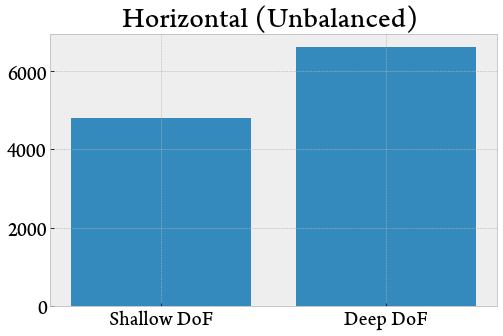

In [516]:
plt.style.use('bmh')
csfont = {'fontname':'Arno Pro'}
hfont = {'fontname':'Arno Pro'}

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.title("Horizontal (Unbalanced) ", **csfont)
plt.xticks([0,1],['Shallow DoF','Deep DoF'], **hfont)
plt.bar(dict(Counter(horizontal['DoF_bin'])).keys(), dict(Counter(horizontal['DoF_bin'])).values())
plt.savefig('horizontal_dof_unbalanced.png')

### Undersample the majority class

In [517]:
dof_one_undersample = dof_one.sample(dof_zero.shape[0], random_state=0)

### Finally concat two bins

In [518]:
horizontal_train_valid_test = pd.concat([dof_zero, dof_one_undersample], axis=0)

In [519]:
horizontal_train_valid_test.shape

(9600, 18)

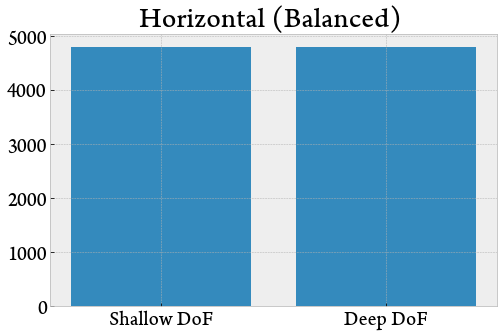

In [521]:
plt.style.use('bmh')
csfont = {'fontname':'Arno Pro'}
hfont = {'fontname':'Arno Pro'}

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.title("Horizontal (Balanced) ", **csfont)
plt.xticks([0,1],['Shallow DoF','Deep DoF'], **hfont)
plt.bar(dict(Counter(horizontal_train_valid_test['DoF_bin'])).keys(), dict(Counter(horizontal_train_valid_test['DoF_bin'])).values())
plt.savefig('horizontal_dof_balanced.png')

## Vertical Dataset Undersample

In [522]:
vertical = train_valid_test_dataset[train_valid_test_dataset['orientation'] == 0]

In [523]:
dof_zero, dof_one = binarize_dataset(vertical)

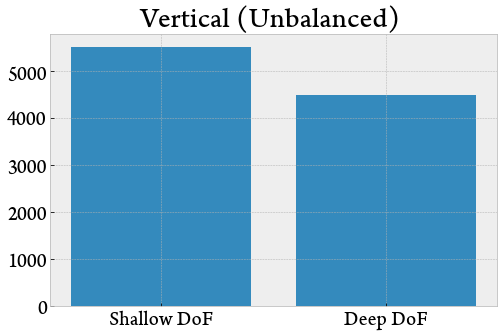

In [524]:
plt.style.use('bmh')
csfont = {'fontname':'Arno Pro'}
hfont = {'fontname':'Arno Pro'}

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.title("Vertical (Unbalanced) ", **csfont)
plt.xticks([0,1],['Shallow DoF','Deep DoF'], **hfont)
plt.bar(dict(Counter(vertical['DoF_bin'])).keys(), dict(Counter(vertical['DoF_bin'])).values())
plt.savefig('vertical_dof_unbalanced.png')

In [536]:
vertical

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
12,rDLBArZUl1c,Panasonic,DMC-GF1,100.0,20.0,1.8,1/200,0,3000,4000,0.750000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,iuZ_D1eoq9k,Canon,Canon EOS 5D,100.0,50.0,1.6,1/1600,0,2912,4368,0.666667,0.0,0.0,0.0,0.0,2.0,1.0,1.0
67,xJqXTBt95tA,Apple,iPhone 5s,32.0,4.2,2.2,1/6849,0,2448,3264,0.750000,0.0,0.0,0.0,0.0,2.0,0.0,0.0
87,mYXXokN8HZ0,SONY,DSC-HX200V,100.0,4.8,2.8,1/1000,0,2736,3648,0.750000,0.0,0.0,0.0,0.0,2.0,0.0,0.0
88,2KXEb_8G5vo,Canon,Canon EOS 5D Mark III,3200.0,16.0,2.8,30,0,3695,5543,0.666607,1.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25299,ypibB9C-W2E,Canon,Canon EOS 5D Mark IV,100.0,200.0,4.0,1/125,0,4405,5506,0.800000,0.0,0.0,1.0,1.0,1.0,1.0,2.0
25300,ypl5fG5fZsM,Canon,Canon EOS REBEL T5,400.0,50.0,1.8,1/2500,0,3456,5184,0.670000,0.0,0.0,0.0,0.0,2.0,1.0,1.0
25304,kVwPcYo1Z3I,FUJIFILM,X-H1,100.0,16.0,5.6,1/15,0,4000,6000,0.670000,0.0,0.0,1.0,1.0,1.0,0.0,0.0
25305,5zWj7K_QVos,NIKON CORPORATION,NIKON D5200,800.0,40.0,4.5,1/6,0,2409,3610,0.670000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Undersample from majority class

In [525]:
dof_zero_undersample = dof_zero.sample(dof_one.shape[0], random_state=0)

In [526]:
vertical_train_valid_test = pd.concat([dof_one, dof_zero_undersample], axis=0)

In [527]:
vertical_train_valid_test.shape

(8988, 18)

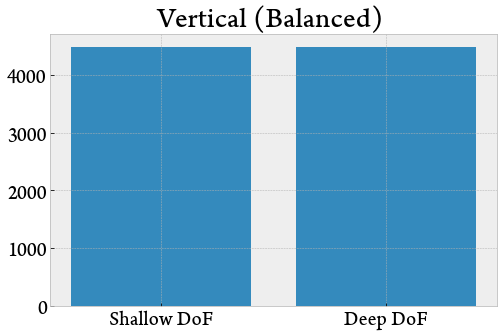

In [530]:
plt.style.use('bmh')
csfont = {'fontname':'Arno Pro'}
hfont = {'fontname':'Arno Pro'}

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.title("Vertical (Balanced) ", **csfont)
plt.xticks([0,1],['Shallow DoF','Deep DoF'], **hfont)
plt.bar(dict(Counter(vertical_train_valid_test['DoF_bin'])).keys(), dict(Counter(vertical_train_valid_test['DoF_bin'])).values())
plt.savefig('vertical_dof_balanced.png')

## Split Train-Validation-Test

In [321]:
def reformat_dataset(dataset):
    
    # Rename to label
    dataset.rename(columns={'DoF_bin':'label'}, inplace=True)

    # Add file extension
    dataset['photo_id'] = dataset.photo_id + '.jpg'

    # Typecast labels
    dataset['label'] = dataset['label'].map(lambda x: int(x))
    
    return dataset

In [356]:
def shuffle_dataset(bin_one, bin_two):
    
    dataset = pd.concat([bin_one, bin_two], axis=0)
    # Shuffle by resample and reindex
    dataset = dataset.sample(dataset.shape[0],random_state=0).reset_index(drop=True)

    return dataset

### Reformat dataset

#### Full

In [336]:
# reformat samples and labels
dof_train_valid_test = reformat_dataset(dof_train_valid_test)

In [337]:
dof_train_valid_test.head()

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
3,kFxWDfj0pD8.jpg,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351,1.0,1.0,0,0.0,2.0,1.0,1.0
7,Gg7uKdHFb_c.jpg,Canon,Canon EOS REBEL T2i,100.0,18.0,3.5,1/1600,1,4442,2961,1.500169,0.0,0.0,0,1.0,2.0,0.0,0.0
9,ItGkpXAr8gk.jpg,Canon,Canon EOS REBEL T3,100.0,50.0,1.8,1/4000,1,4272,2848,1.500000,0.0,0.0,0,0.0,2.0,1.0,1.0
12,rDLBArZUl1c.jpg,Panasonic,DMC-GF1,100.0,20.0,1.8,1/200,0,3000,4000,0.750000,0.0,0.0,0,0.0,1.0,0.0,0.0
16,-Y-XzY0HhEM.jpg,Panasonic,DMC-SZ1,100.0,4.5,3.1,1/60,1,4608,3456,1.333333,0.0,0.0,0,0.0,1.0,0.0,0.0


In [538]:
dof_train_valid_test.tail()

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
11017,XMQI7_Q6ofM,Canon,Canon EOS 6D Mark II,100.0,35.0,7.1,1/250,1,6127,4085,1.499878,0.0,0.0,1.0,2.0,1.0,0.0,0.0
22686,qsEJGX4VqYU,PENTAX RICOH IMAGING,GR,100.0,18.3,5.0,1/125,1,2500,1656,1.509662,0.0,0.0,1.0,1.0,1.0,0.0,0.0
15184,ElOpIMNu-eA,SONY,ILCE-7M2,100.0,70.0,8.0,1/160,0,4000,5333,0.750047,0.0,0.0,1.0,2.0,1.0,1.0,1.0
7141,BVPQcIjXQ0o,SONY,ILCE-7M3,200.0,200.0,4.5,1/100,1,3002,2402,1.249792,0.0,0.0,1.0,1.0,1.0,1.0,2.0
6193,8eJYLrG6cf0,SONY,ILCE-7RM2,100.0,32.0,4.5,1/1000,1,5256,5121,1.026362,0.0,0.0,1.0,1.0,2.0,0.0,0.0


#### Horizontal

In [390]:
horizontal_train_valid_test = reformat_dataset(horizontal_train_valid_test)

In [458]:
horizontal_train_valid_test.head()

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
3,kFxWDfj0pD8.jpg,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,4272,2797,1.527351,1.0,1.0,0,0.0,2.0,1.0,1.0
7,Gg7uKdHFb_c.jpg,Canon,Canon EOS REBEL T2i,100.0,18.0,3.5,1/1600,1,4442,2961,1.500169,0.0,0.0,0,1.0,2.0,0.0,0.0
9,ItGkpXAr8gk.jpg,Canon,Canon EOS REBEL T3,100.0,50.0,1.8,1/4000,1,4272,2848,1.500000,0.0,0.0,0,0.0,2.0,1.0,1.0
16,-Y-XzY0HhEM.jpg,Panasonic,DMC-SZ1,100.0,4.5,3.1,1/60,1,4608,3456,1.333333,0.0,0.0,0,0.0,1.0,0.0,0.0
32,BeD3vjQ8SI0.jpg,FUJIFILM,X-E1,200.0,35.0,1.4,1/1700,1,4896,3264,1.500000,0.0,0.0,0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442,dduRtiR5q8Q.jpg,Canon,Canon EOS 1200D,100.0,36.0,4.5,1/125,1,5184,3456,1.500000,0.0,0.0,1,1.0,1.0,1.0,1.0
3025,g9M46POadWU.jpg,Canon,Canon EOS 5D Mark III,1250.0,165.0,9.0,1/6400,1,5760,3840,1.500000,1.0,1.0,1,2.0,2.0,1.0,2.0
12745,UUbs2ViJgog.jpg,Canon,Canon EOS 550D,400.0,27.0,4.0,1/60,1,5196,3462,1.500867,0.0,0.0,1,1.0,1.0,0.0,0.0
14089,7p_qy_CmczI.jpg,FUJIFILM,X100S,250.0,23.0,8.0,1/250,1,3456,1944,1.777778,0.0,0.0,1,2.0,1.0,0.0,0.0


In [449]:
horizontal_train_valid_test[horizontal_train_valid_test['photo_id']=='9ngA7Xyhnuc.jpg']

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
22308,9ngA7Xyhnuc.jpg,FUJIFILM,X-T20,100.0,18.0,2.0,1/200,1,2709,2707,1.000739,0.0,0.0,0,0.0,1.0,0.0,0.0


In [457]:
horizontal_train_valid_test[horizontal_train_valid_test['photo_aspect_ratio'] < 1.01]

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
5604,pB9WGRda1kk.jpg,DJI,FC2103,101.0,4.5,2.8,1/1600,1,4056,4040,1.003960,0.0,0.0,0,0.0,2.0,0.0,0.0
7842,8-Aght_oHog.jpg,SONY,ILCE-7SM2,320.0,28.0,2.8,1/50,1,2431,2422,1.003716,0.0,0.0,0,0.0,1.0,0.0,0.0
18342,sYzFIusQp3Q.jpg,Apple,iPhone 6 Plus,32.0,4.2,2.2,1/3049,1,2122,2114,1.003784,0.0,0.0,0,0.0,2.0,0.0,0.0
22308,9ngA7Xyhnuc.jpg,FUJIFILM,X-T20,100.0,18.0,2.0,1/200,1,2709,2707,1.000739,0.0,0.0,0,0.0,1.0,0.0,0.0
24058,MduvNGZQqd0.jpg,Apple,iPhone X,20.0,4.0,1.8,1/3205,1,2714,2712,1.000737,0.0,0.0,0,0.0,2.0,0.0,0.0
25042,LbAeanvJGsk.jpg,Canon,Canon EOS 650D,100.0,50.0,2.5,1/4000,1,3456,3453,1.000000,0.0,0.0,0,0.0,2.0,1.0,1.0
11660,YXIZOBSOWIU.jpg,NIKON CORPORATION,NIKON D3300,400.0,55.0,11.0,1/400,1,4010,4000,1.002500,0.0,0.0,1,2.0,2.0,1.0,1.0
7326,AjvD0Dkh-A4.jpg,SONY,ILCE-7RM2,80.0,70.0,5.6,1/1250,1,3881,3865,1.004140,0.0,0.0,1,1.0,2.0,1.0,1.0
17090,sGwdsTwQm7U.jpg,SONY,ILCE-7M3,400.0,31.0,5.6,1/640,1,2904,2880,1.008333,0.0,0.0,1,1.0,2.0,0.0,0.0


In [453]:
photos[photos['photo_id']=='MduvNGZQqd0']

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
24058,MduvNGZQqd0,Apple,iPhone X,20.0,4.0,1.8,1/3205,1,2714,2712,1.000737,0.0,0.0,0.0,0.0,2.0,0.0,0.0


#### Vertical

In [406]:
vertical_train_valid_test = reformat_dataset(vertical_train_valid_test)

In [407]:
vertical_train_valid_test.head()

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
115,kx8FdCycanQ.jpg,SONY,ILCE-7M2,100.0,16.0,6.3,1/400,0,3943,5325,0.740469,0.0,0.0,1,2.0,2.0,0.0,0.0
136,8fYhrgV_IWg.jpg,Canon,Canon EOS 1100D,100.0,39.0,6.3,1/1000,0,2848,4272,0.666667,0.0,0.0,1,2.0,2.0,1.0,1.0
174,EXbGG5dBZKw.jpg,Canon,Canon PowerShot G7 X,250.0,8.8,4.0,1/640,0,3648,4560,0.800000,0.0,0.0,1,1.0,2.0,0.0,0.0
190,agE97zp_Xvo.jpg,SAMSUNG TECHWIN Co.,SAMSUNG GX10,400.0,40.0,9.5,1/750,0,2577,2577,1.000000,0.0,0.0,1,2.0,2.0,1.0,1.0
204,F0dmGPe2KG0.jpg,NIKON CORPORATION,NIKON D5500,1800.0,200.0,4.0,1/320,0,2200,3300,0.666667,1.0,2.0,1,1.0,2.0,1.0,2.0


### Create balanced train-valid-test sets

In [389]:
def train_valid_test_split(dataset):
    # Find the middle point
    class_samples = dataset.shape[0]/2    

    # Get 80% of the dataset
    train_perce = round(class_samples * 80/100)
    valid_test_perce = round(class_samples * 10/100)

    train_zero = dataset[0:round(class_samples * 80/100)]
    train_one = dataset[int(class_samples): int(class_samples) + train_perce]

    valid_zero = dataset[train_zero.shape[0]: train_zero.shape[0]+ valid_test_perce]
    valid_one = dataset[int(class_samples) + train_one.shape[0]: int(class_samples) + train_one.shape[0] + valid_test_perce]

    test_zero = dataset[train_zero.shape[0] + valid_zero.shape[0] : train_zero.shape[0] + valid_zero.shape[0] + valid_test_perce]
    test_one = dataset[int(class_samples) + train_one.shape[0] + valid_one.shape[0]: int(class_samples) + train_one.shape[0]+ valid_one.shape[0] + valid_test_perce]
    
    # Shuffle and merge    
    train = shuffle_dataset(train_one, train_zero)
    valid = shuffle_dataset(valid_one, valid_zero)
    test = shuffle_dataset(test_one, test_zero)
    
    return train, valid, test

In [393]:
train_horizontal, valid_horizontal, test_horizontal = train_valid_test_split(horizontal_train_valid_test)

In [408]:
train_vertical, valid_vertical, test_vertical = train_valid_test_split(vertical_train_valid_test)

In [393]:
train_full, valid_full, test_full = train_valid_test_split(dof_train_valid_test)

In [417]:
horizontal_train_valid_test.shape

(9600, 18)

In [418]:
vertical_train_valid_test.shape

(8988, 18)

In [419]:
dof_train_valid_test.shape

(20644, 18)

In [423]:
dict(Counter(horizontal_train_valid_test['label'])).values()

dict_values([4800, 4800])

### Write dataset

In [539]:
train_full.head()

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
0,m-ZemAIkXlE.jpg,Canon,Canon EOS-1D X Mark II,320.0,85.0,3.5,1/640,1,5472,3648,1.500000,0.0,0.0,0,1.0,2.0,1.0,1.0
1,4uKTkjE8Dyk.jpg,NIKON CORPORATION,NIKON D850,800.0,600.0,8.0,1/500,1,5642,4360,1.294037,1.0,1.0,1,2.0,2.0,1.0,2.0
2,6ZHXBGH2rDY.jpg,NIKON CORPORATION,NIKON D3300,400.0,50.0,5.6,1/125,0,3950,5266,0.750095,0.0,0.0,1,1.0,1.0,1.0,1.0
3,TXtjSg9cDgk.jpg,Canon,Canon EOS REBEL T3i,200.0,50.0,2.8,1/500,1,3000,2000,1.500000,0.0,0.0,0,0.0,2.0,1.0,1.0
4,tyNFhbgnKLY.jpg,Canon,Canon EOS 6D,100.0,35.0,1.4,1/125,0,3494,5241,0.666667,0.0,0.0,0,0.0,1.0,0.0,0.0


In [365]:
train_full.to_csv('../../../dataset/csv/exif-dataset/full/train.csv')
valid_full.to_csv('../../../dataset/csv/exif-dataset/full/valid.csv')
test_full.to_csv('../../../dataset/csv/exif-dataset/full/test.csv')
#test_nan_full.to_csv('../../../dataset/full/nan_test.csv')

In [397]:
train_horizontal.to_csv('../../../dataset/csv/exif-dataset/horizontal/train_horizontal.csv')
valid_horizontal.to_csv('../../../dataset/csv/exif-dataset/horizontal/valid_horizontal.csv')
test_horizontal.to_csv('../../../dataset/csv/exif-dataset/horizontal/test_horizontal.csv')

In [416]:
train_vertical.to_csv('../../../dataset/csv/exif-dataset/vertical/train_vertical.csv')
valid_vertical.to_csv('../../../dataset/csv/exif-dataset/vertical/valid_vertical.csv')
test_vertical.to_csv('../../../dataset/csv/exif-dataset/vertical/test_vertical.csv')

### Misc section

In [472]:
train_full[train_full['exif_iso']==5000]

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,photo_width,photo_height,photo_aspect_ratio,iso_noise_bin_label,iso_noise_label,label,DoF,exposure_label,focal_label_bin,focal_label
127,BvhEMt3epmU.jpg,SONY,ILCE-7M2,5000.0,23.0,16.0,1/1000,1,3070,2048,1.499023,1.0,2.0,1,2.0,2.0,0.0,0.0
157,J6j1HgSi40c.jpg,NIKON CORPORATION,NIKON D810,5000.0,35.0,1.4,1/4000,0,4912,6950,0.706763,1.0,2.0,0,0.0,2.0,0.0,0.0
421,hYea-WWUUsM.jpg,Canon,Canon EOS 7D,5000.0,57.0,5.0,1/50,1,5184,3456,1.500000,1.0,2.0,1,1.0,1.0,1.0,1.0
1059,DbDq4Am_ojw.jpg,Canon,Canon EOS 80D,5000.0,300.0,5.6,1/1000,1,6000,4000,1.500000,1.0,2.0,1,1.0,2.0,1.0,2.0
1146,aZvsnQarMzA.jpg,NIKON CORPORATION,NIKON D800E,5000.0,14.0,4.0,30,0,4912,7360,0.667391,1.0,2.0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,fsJB3KT2rj8.jpg,NIKON CORPORATION,NIKON D750,5000.0,24.0,2.8,25,0,3654,5473,0.667641,1.0,2.0,0,0.0,0.0,0.0,0.0
15465,k6fWPNVfXdQ.jpg,NIKON CORPORATION,NIKON D7200,5000.0,112.0,29.0,1/200,1,6000,4000,1.500000,1.0,2.0,1,2.0,1.0,1.0,2.0
15519,fVlPEk2j2ak.jpg,Canon,Canon EOS 750D,5000.0,55.0,5.6,1/800,1,6000,4000,1.500000,1.0,2.0,1,1.0,2.0,1.0,1.0
15904,YQN-5gdd-yw.jpg,NIKON CORPORATION,NIKON D610,5000.0,24.0,3.5,1/100,1,6016,4016,1.498008,1.0,2.0,0,1.0,1.0,0.0,0.0


In [ ]:
dataset['exif_iso'].loc[dataset['exif_exposure_time'] == '41 X 300 "']

In [52]:
photos['exif_camera_model']

0                   SLT-A77V
1            Canon EOS 1100D
2        Canon EOS REBEL T3i
3         Canon EOS REBEL T3
4                NIKON D3200
                ...         
24992                  FC220
24993            NIKON D7200
24996            Canon EOS R
24997    Canon EOS Rebel SL2
24998              ILCE-6000
Name: exif_camera_model, Length: 21203, dtype: object

In [10]:
u_cameras = photos['exif_camera_model'].unique()
cameras = photos['exif_camera_model'].to_string()
print("Unique cameras %d" % len(u_cameras))

Unique cameras 913


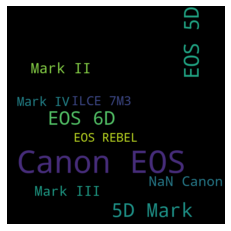

In [76]:
camera_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(cameras)
plt.axis("off")
plt.imshow(camera_cloud, interpolation='bilinear')

### Keywords

In [14]:
datasets['keywords'].columns

Index(['photo_id', 'keyword', 'ai_service_1_confidence',
       'ai_service_2_confidence', 'suggested_by_user'],
      dtype='object')

In [15]:
u_keywords = datasets['keywords']['keyword'].unique()
keywords = datasets['keywords']['keyword'].to_string()
print("Unique keywords %d" % len(u_keywords))

Unique keywords 27613


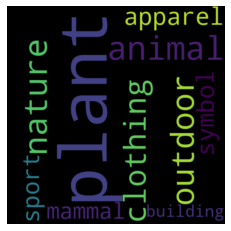

In [77]:
keyword_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(keywords)
plt.axis("off")
plt.imshow(keyword_cloud, interpolation='bilinear')

## Conversions

In [17]:
u_conversions_keys = datasets['conversions']['keyword'].unique()
print(len(u_conversions_keys))

223508


In [18]:
converstions_keys = datasets['conversions']['keyword'].to_string()
convertion_key_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(converstions_keys)


NameError: name 'plt' is not defined

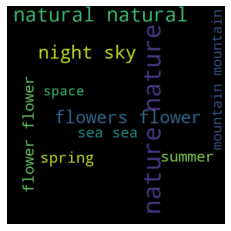

In [20]:
plt.axis("off")
plt.imshow(convertion_key_cloud, interpolation='bilinear')

## Collections

In [21]:
u_collections_titles = datasets['collections']['collection_title'].unique()
print(len(u_collections_titles))

178154


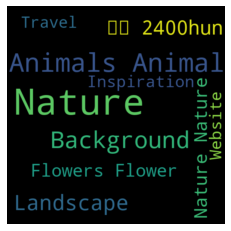

In [22]:
collections_titles = datasets['collections']['collection_title'].to_string()
collections_titles_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(collections_titles)
plt.axis("off")
plt.imshow(collections_titles_cloud, interpolation='bilinear')

In [ ]:
## Locate photos

In [ ]:
dataset['photo_id'].loc[dataset['exif_exposure_time'] == '915']

In [53]:
datasets['photos']['photo_image_url'].loc[datasets['photos']['photo_id'] == 'sEDzxW4NhL4']

18136    https://images.unsplash.com/photo-158601949619...
Name: photo_image_url, dtype: object

In [17]:
photos.loc[photos['photo_id'] == 'WSKaNV76wRs']

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation
5557,WSKaNV76wRs,SONY,ILCE-7,100.0,60.0,100.0,1/125,1


In [12]:
datasets['photos'].loc[datasets['photos']['photo_id'] == '8ZgJyLGbC7Y']

NameError: name 'datasets' is not defined

In [28]:
datasets['conversions'].loc[datasets['conversions']['photo_id'] == '0b4sfNTqBLU']

,converted_at,conversion_type,keyword,photo_id,anonymous_user_id,conversion_country
8905,2020-02-29 18:49:47,download,marijuana,0b4sfNTqBLU,2689c4a3-6067-49f1-8bf7-09473c8bdb77,CA
59639,2020-03-03 19:07:10,download,cannabis,0b4sfNTqBLU,9cd972ff-edfa-42c3-9a9f-32f453b1639e,US
156240,2020-03-09 21:46:01,download,marijuana,0b4sfNTqBLU,1cdd8d2d-1473-4d8e-b3d1-ccd756f28ac0,US
174619,2020-03-16 15:06:48,download,marijuana and tinctures,0b4sfNTqBLU,fbd50bb1-3ccd-46d5-b82c-c8ec16e45ea8,US
187922,2020-03-12 20:19:13,download,cannabis,0b4sfNTqBLU,90b05b6a-193a-42de-b1d2-8fd63f04fd55,CA
...,...,...,...,...,...,...
3812100,2020-06-26 20:43:50.548,download,eating food,0b4sfNTqBLU,d9d4bf8b-a191-4173-9a7c-267652506775,ES
3826644,2020-06-11 19:39:05.418,download,cannabis,0b4sfNTqBLU,d1d4d773-1d04-4ea6-a769-3e3eeaba61d2,US
3835821,2020-06-28 05:41:50.859,download,eating,0b4sfNTqBLU,0bd3aea8-96c7-4f88-b425-01d6f11a399a,US
3969802,2020-06-19 00:57:03.419,download,weed,0b4sfNTqBLU,4fa35bf0-403e-435c-be55-2d6142786ae8,TW


In [29]:
datasets['keywords'].loc[datasets['keywords']['photo_id'] == '0b4sfNTqBLU']

,photo_id,keyword,ai_service_1_confidence,ai_service_2_confidence,suggested_by_user
2619868,0b4sfNTqBLU,closet,24.967670,NaN,f
2619869,0b4sfNTqBLU,fashion,23.274206,NaN,f
2619870,0b4sfNTqBLU,military,37.976463,NaN,f
2619871,0b4sfNTqBLU,accessory,92.576630,NaN,f
2619872,0b4sfNTqBLU,candy,24.741817,NaN,f
...,...,...,...,...,...
2620003,0b4sfNTqBLU,teeth,16.160416,NaN,f
2620004,0b4sfNTqBLU,burger,38.315941,NaN,f
2620005,0b4sfNTqBLU,confectionery,42.486397,NaN,f
2620006,0b4sfNTqBLU,neck,23.576967,NaN,f


In [30]:
datasets['collections'].loc[datasets['collections']['photo_id'] == '0b4sfNTqBLU']

,photo_id,collection_id,collection_title,photo_collected_at
41721,0b4sfNTqBLU,9314334,CALIPHORIA,2020-01-02 04:12:49
41722,0b4sfNTqBLU,3558778,Women,2018-11-22 09:09:46
41723,0b4sfNTqBLU,1367542,Pessoas,2017-11-08 09:36:27
41724,0b4sfNTqBLU,4488418,Cannabis + Lifestyle,2019-03-19 20:55:02
41725,0b4sfNTqBLU,8568557,Ver Smaerts,2019-09-04 17:46:16
...,...,...,...,...
41742,0b4sfNTqBLU,3659376,bud,2018-12-12 01:39:59
41743,0b4sfNTqBLU,6137119,feeding,2019-07-01 12:54:18
41744,0b4sfNTqBLU,3358754,People,2018-10-15 01:18:02
41745,0b4sfNTqBLU,9527448,BTS Stories,2020-02-11 15:37:32


In [4]:
datasets['photos']['photo_id'][21000]

'K03EeiFqtps'

## Save URLs

In [17]:
save_path = '/home/steve/Documents/Msc data science/Thesis/dataset/unsplash-dataset/'

In [31]:
url_list = datasets['photos']['photo_image_url'].values

In [32]:
url_list

array(['https://images.unsplash.com/40/KJyFV5SZSweiYGhMhrqC_MD4817.jpg',
       'https://images.unsplash.com/31/xDtuvK3GRJGUSUHgj0ew_IMG_3860.jpg',
       'https://images.unsplash.com/photo-1415353115981-9bb4c22bafed',
       ...,
       'https://images.unsplash.com/photo-1591568164230-62371697e356',
       'https://images.unsplash.com/photo-1591229677225-2e8fc742b80c',
       'https://images.unsplash.com/photo-1591391974719-b03b035e8e5b'],
      dtype=object)

In [34]:
np.savetxt(save_path+'urls.txt', url_list, fmt='%15s')

In [309]:
'''
There were two missing images
'''
ids =  datasets['photos'].loc[:,['photo_id']]
sids = ids[:15000].sort_values(by='photo_id')

path = '/media/steve/Data2/unsplash-dataset/images/'
files = glob.glob(path + "*.jpg")

mids = []
for f in files:
    mids.append(f.split('/')[6].split('.')[0])

mids.sort()

mids.append('2')

sids['mid'] = mids

comparison_column = np.where(sids["photo_id"] == sids["mid"], True, False)